# Before running the notebook, check and install the components listed in **requirement.txt** file.

### This notebook contains works on both dataset. 

In [232]:
Author={'Dip':['170104003','CSE4.1'],
        'Dhusor':['170104006','CSE4.1'],
        'Labib':['170204114','CSE3.2'] 
        }

[ **1 ) Introduction**](#content1)<br>
[ **2 ) Dataset insight_002.xlsx**](#content2)<br>
[ **3 ) Dataset insight 001.csv**](#content3)<br>
[ **4 ) Conclusion**](#content1)

<a id="content1"></a>
 # Introduction
 <br> </br>
We have used EDA (Exploratory Data Analysis) technique to understand the various aspects of the data. It includes several techniques in a sequence that we will follow. The aim is to make sure that the data is clean and does not have any redundancy or missing values or null values in the dataset. We have to identify the important variables in the dataset and remove all noise as they may hinder our data analysis and conclusions. We need to understand the relationships between the variables. Finally we'll be able to derive conclusive interpretation.

## Importing the libraries and setup

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm , skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


<a id="content2"></a>
 ## Loading the insight_002.xlsx dataset
 <br> </br>

In [234]:
data1=pd.read_excel('insight_002.xlsx',skiprows=[1])
type(data1)


pandas.core.frame.DataFrame

## Taking a Look at the data

In [235]:
data1

,Post ID,Post Message,Type,Countries,Languages,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,...,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
0,1277547548992987_1741796732568064,Congratulations to the winners of the first on...,Photo,NaN,NaN,2018-06-22 07:58:04,,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1277547548992987_1731769263570811,May your Eid celebrations be as charming as th...,Video,NaN,NaN,2018-06-15 13:43:23,,1556,1556,0,...,72,93,0,0,389,500,0,0,5035,24355
2,1277547548992987_1731343926946678,Wishing everyone a very happy Eid al-Fitr. As ...,Photo,NaN,NaN,2018-06-15 06:57:45,,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,1277547548992987_1727479250666479,What's trending this eid? 🤔,Photo,NaN,NaN,2018-06-12 11:33:50,,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1277547548992987_1725257400888664,Hey IDCians! We are here with our first online...,Photo,NaN,NaN,2018-06-10 08:50:56,,2,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1277547548992987_3467535573327496,Hear about the prestigious global finale and t...,Status,NaN,NaN,2020-10-16 02:05:24,,634,634,0,...,0,0,0,0,0,0,0,0,0,0
287,1277547548992987_3446951235385930,To know more about RB Global Challenge and How...,SharedVideo,NaN,NaN,2020-10-09 02:25:41,,654,654,0,...,0,0,0,0,53,54,0,0,0,15145
288,1277547548992987_3425382470876140,Registration window of RB Global Challenge is ...,SharedVideo,NaN,NaN,2020-10-02 07:00:42,,488,488,0,...,0,0,0,0,16,16,0,0,0,115008
289,1277547548992987_3419141484833572,"The Result: Nin presents ""Spill the Ink""!! --...",Photo,NaN,NaN,2020-09-30 08:30:47,,969,969,0,...,0,0,0,0,0,0,0,0,0,0


# Understanding the data
The dataset contains 291 row and 33 columns. The dataset contains details on posts that were published on **AUST Innovation and Design Club** Facebook page from 2018 to 2021. The data was generated using Facebook insights tool. We need to find if the dataset contains any redundancy and eliminate.

In [236]:
data1.columns


Index(['Post ID', 'Post Message', 'Type', 'Countries', 'Languages', 'Posted',
       'Audience Targeting', 'Lifetime Post Total Reach',
       'Lifetime Post organic reach', 'Lifetime Post Paid Reach',
       'Lifetime Post Total Impressions', 'Lifetime Post Organic Impressions',
       'Lifetime Post Paid Impressions', 'Lifetime Engaged Users',
       'Lifetime Matched Audience Targeting Consumers on Post',
       'Lifetime Matched Audience Targeting Consumptions on Post',
       'Lifetime Negative Feedback from Users', 'Lifetime Negative Feedback',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime Post Paid Impressions by people who have liked your Page',
       'Lifetime Paid reach of a post by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Lifetime Organic views to 95%', 'Lifetime Organic views to 95%.1',
       'Lifetim

In [237]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 33 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Post ID                                                              291 non-null    object        
 1   Post Message                                                         273 non-null    object        
 2   Type                                                                 289 non-null    object        
 3   Countries                                                            0 non-null      float64       
 4   Languages                                                            0 non-null      float64       
 5   Posted                                                               291 non-null    datetime64[ns]
 6   Audience Targeting                                

In [238]:
data1.nunique()

Post ID                                                                291
Post Message                                                           270
Type                                                                     5
Countries                                                                0
Languages                                                                0
Posted                                                                 291
Audience Targeting                                                       1
Lifetime Post Total Reach                                              230
Lifetime Post organic reach                                            230
Lifetime Post Paid Reach                                                 1
Lifetime Post Total Impressions                                        234
Lifetime Post Organic Impressions                                      234
Lifetime Post Paid Impressions                                           1
Lifetime Engaged Users   

## Checking for missing data

In [239]:
total = data1.isnull().sum().sort_values(ascending=False)
total=total[total>0]
percent = (total/total.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Countries,291,72.75
Languages,291,72.75
Post Message,18,4.50
Type,2,0.50


## Dropping Columns
**Countries**  and **Languages** has more than 72% missing data

In [240]:
data1.drop(['Countries','Languages'],axis=1,inplace=True)

Columns Type that has some NA values which indicates only text message. Text message has not significant features. So we can ignore only text post

In [241]:
missing_type=data1[data1['Type'].isna()]

In [242]:
missing_type

,Post ID,Post Message,Type,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,...,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
70,1277547548992987_2095212047226529,We have an immediate need for a Public Relatio...,NaN,2019-02-23 05:52:01,,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
82,1277547548992987_2074504412630626,### AUST IDC Graphic Designer Recruitment ### ...,NaN,2019-02-10 00:00:01,,3,3,0,4,4,...,0,0,0,0,0,0,0,0,0,0


## Removing missing values

In [243]:
data1.dropna(axis = 0, inplace = True) 

In [244]:
total = data1.isnull().sum().sort_values(ascending=False)
total=total[total>0]
percent = (total/total.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent


In [245]:
 data1.nunique(axis=0)

Post ID                                                                271
Post Message                                                           268
Type                                                                     5
Posted                                                                 271
Audience Targeting                                                       1
Lifetime Post Total Reach                                              216
Lifetime Post organic reach                                            216
Lifetime Post Paid Reach                                                 1
Lifetime Post Total Impressions                                        220
Lifetime Post Organic Impressions                                      220
Lifetime Post Paid Impressions                                           1
Lifetime Engaged Users                                                 159
Lifetime Matched Audience Targeting Consumers on Post                  148
Lifetime Matched Audience

## Analyzing columns
**Audience Targeting** has same non-unique values in each rows. Hence, it is of no use. 
**Lifetime Post Paid Reach** and **Lifetime Post Paid Impressions** are the post that were boosted using Facebook Ad.We can see no posts were boosted using Facebook ad. We can drop the columns. 
Again, **Lifetime Post Total Reach**, sums up **Lifetime Post Paid Reach** and **Lifetime Post Organic Reach**. So we can drop both **Lifetime Post Paid Reach** and **Lifetime Post Organic Reach**.
Same decision goes for **Lifetime Post Paid Impressions** and **Lifetime Post Organic Impressions**.

In [246]:
data1['Audience Targeting'].value_counts() #column 'Audience Targeting' dont have important to dataset. 

     271
Name: Audience Targeting, dtype: int64

In [247]:
data1['Lifetime Post Paid Reach'].value_counts() #column 'Lifetime Post Paid Reach' dont have important to dataset. 

0    271
Name: Lifetime Post Paid Reach, dtype: int64

In [248]:
data1['Lifetime Post Paid Impressions'].value_counts() #column 'Lifetime Post Paid Impressions' dont have important to dataset. 

0    271
Name: Lifetime Post Paid Impressions, dtype: int64

In [249]:
data1['Lifetime Negative Feedback'].value_counts() #column 'Lifetime Negative Feedback' dont have important to dataset with respect to post reach/impression numbers. 

0    235
1     30
2      2
4      2
3      1
8      1
Name: Lifetime Negative Feedback, dtype: int64

In [250]:
data1['Lifetime Post Paid Impressions by people who have liked your Page'].value_counts() #column 'Lifetime Post Paid Impressions by people who have liked your Page' dont have important to dataset. 

0    271
Name: Lifetime Post Paid Impressions by people who have liked your Page, dtype: int64

In [251]:
data1['Lifetime Paid reach of a post by people who like your Page'].value_counts() #column 'Lifetime Paid reach of a post by people who like your Page' dont have important to dataset. 

0    271
Name: Lifetime Paid reach of a post by people who like your Page, dtype: int64

In [252]:
data1['Lifetime Paid views to 95%'].value_counts()

0    271
Name: Lifetime Paid views to 95%, dtype: int64

In [253]:
data1['Lifetime Paid views to 95%.1'].value_counts()

0    271
Name: Lifetime Paid views to 95%.1, dtype: int64

In [254]:
data1['Lifetime Paid Video Views'].value_counts()

0    271
Name: Lifetime Paid Video Views, dtype: int64

In [255]:
data1['Lifetime Paid Video Views.1'].value_counts()

0    271
Name: Lifetime Paid Video Views.1, dtype: int64

## Dropping the columns

In [256]:
data1.drop(['Lifetime Post Paid Reach','Audience Targeting','Lifetime Post Paid Impressions',
           'Lifetime Post Paid Impressions by people who have liked your Page',
           'Lifetime Paid reach of a post by people who like your Page',
           'Lifetime Paid views to 95%','Lifetime Paid views to 95%.1',
           'Lifetime Paid Video Views','Lifetime Paid Video Views.1',
           'Lifetime Post organic reach', 'Lifetime Post Organic Impressions',
           'Lifetime Negative Feedback','Lifetime Negative Feedback'],axis=1,inplace=True)

In [257]:
 data1.nunique(axis=0)

Post ID                                                                271
Post Message                                                           268
Type                                                                     5
Posted                                                                 271
Lifetime Post Total Reach                                              216
Lifetime Post Total Impressions                                        220
Lifetime Engaged Users                                                 159
Lifetime Matched Audience Targeting Consumers on Post                  148
Lifetime Matched Audience Targeting Consumptions on Post               162
Lifetime Negative Feedback from Users                                    5
Lifetime Post Impressions by people who have liked your Page           215
Lifetime Post reach by people who like your Page                       207
Lifetime People who have liked your Page and engaged with your post    146
Lifetime Organic views to

## Save modified data frame and export to csv

In [258]:
data1.to_csv('Clean_insight_002.csv', index = False)

# Vizualization 

In [259]:
data=pd.read_csv('Clean_insight_002.csv')

In [260]:
data.columns

Index(['Post ID', 'Post Message', 'Type', 'Posted',
       'Lifetime Post Total Reach', 'Lifetime Post Total Impressions',
       'Lifetime Engaged Users',
       'Lifetime Matched Audience Targeting Consumers on Post',
       'Lifetime Matched Audience Targeting Consumptions on Post',
       'Lifetime Negative Feedback from Users',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Lifetime Organic views to 95%', 'Lifetime Organic views to 95%.1',
       'Lifetime Organic Video Views', 'Lifetime Organic Video Views.1',
       'Lifetime Average time video viewed', 'Lifetime Video length'],
      dtype='object')

In [261]:
data.head()

,Post ID,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Average time video viewed,Lifetime Video length
0,1277547548992987_1741796732568064,Congratulations to the winners of the first on...,Photo,2018-06-22 07:58:04,2,2,0,0,0,0,2,2,0,0,0,0,0,0,0
1,1277547548992987_1731769263570811,May your Eid celebrations be as charming as th...,Video,2018-06-15 13:43:23,1556,3125,148,98,158,0,2119,1001,108,72,93,389,500,5035,24355
2,1277547548992987_1731343926946678,Wishing everyone a very happy Eid al-Fitr. As ...,Photo,2018-06-15 06:57:45,2,2,0,0,0,0,2,2,0,0,0,0,0,0,0
3,1277547548992987_1727479250666479,What's trending this eid? 🤔,Photo,2018-06-12 11:33:50,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1277547548992987_1725257400888664,Hey IDCians! We are here with our first online...,Photo,2018-06-10 08:50:56,2,2,0,0,0,0,1,1,0,0,0,0,0,0,0


In [262]:
data.tail()

,Post ID,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Average time video viewed,Lifetime Video length
266,1277547548992987_3467535573327496,Hear about the prestigious global finale and t...,Status,2020-10-16 02:05:24,634,726,4,3,3,0,539,456,4,0,0,0,0,0,0
267,1277547548992987_3446951235385930,To know more about RB Global Challenge and How...,SharedVideo,2020-10-09 02:25:41,654,758,10,7,8,0,590,492,10,0,0,53,54,0,15145
268,1277547548992987_3425382470876140,Registration window of RB Global Challenge is ...,SharedVideo,2020-10-02 07:00:42,488,563,8,5,6,0,400,340,8,0,0,16,16,0,115008
269,1277547548992987_3419141484833572,"The Result: Nin presents ""Spill the Ink""!! --...",Photo,2020-09-30 08:30:47,969,1148,26,13,17,0,888,719,24,0,0,0,0,0,0
270,1277547548992987_3418991018181952,"The Result: Nin presents ""Spill the Ink""!! --...",Photo,2020-09-30 06:57:22,2149,2611,316,194,304,0,1047,846,56,0,0,0,0,0,0


In [263]:
data.describe()

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Average time video viewed,Lifetime Video length
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,2.710000e+02
mean,1875.129151,2620.169742,166.664207,126.560886,187.867159,0.180812,1480.236162,1000.276753,113.583026,23.767528,27.273063,144.697417,192.830258,1180.859779,1.407881e+05
std,2591.533526,3907.160523,287.653962,238.154702,398.328206,0.650186,1643.745158,928.967017,157.638403,113.220963,132.201471,550.716157,802.791385,8546.238877,1.075635e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,353.500000,398.500000,7.000000,4.500000,5.000000,0.000000,303.500000,276.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,925.000000,1092.000000,54.000000,41.000000,51.000000,0.000000,949.000000,753.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2426.000000,3233.500000,216.500000,131.000000,185.500000,0.000000,2105.000000,1503.500000,156.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,19865.000000,31586.000000,2521.000000,2264.000000,4419.000000,8.000000,8812.000000,4275.000000,1136.000000,1159.000000,1438.000000,5742.000000,8594.000000,135835.000000,1.418091e+07


## Generating Heatmap
A heatmap is a data visualization technique that uses color in a 2-dimensional form to show how a value of interest changes depending on the values of other variables. To create a heatmap in Python, we can use the seaborn library. which is built on top of Matplotlib. Seaborn library provides a high-level data visualization interface where we can draw our matrix.



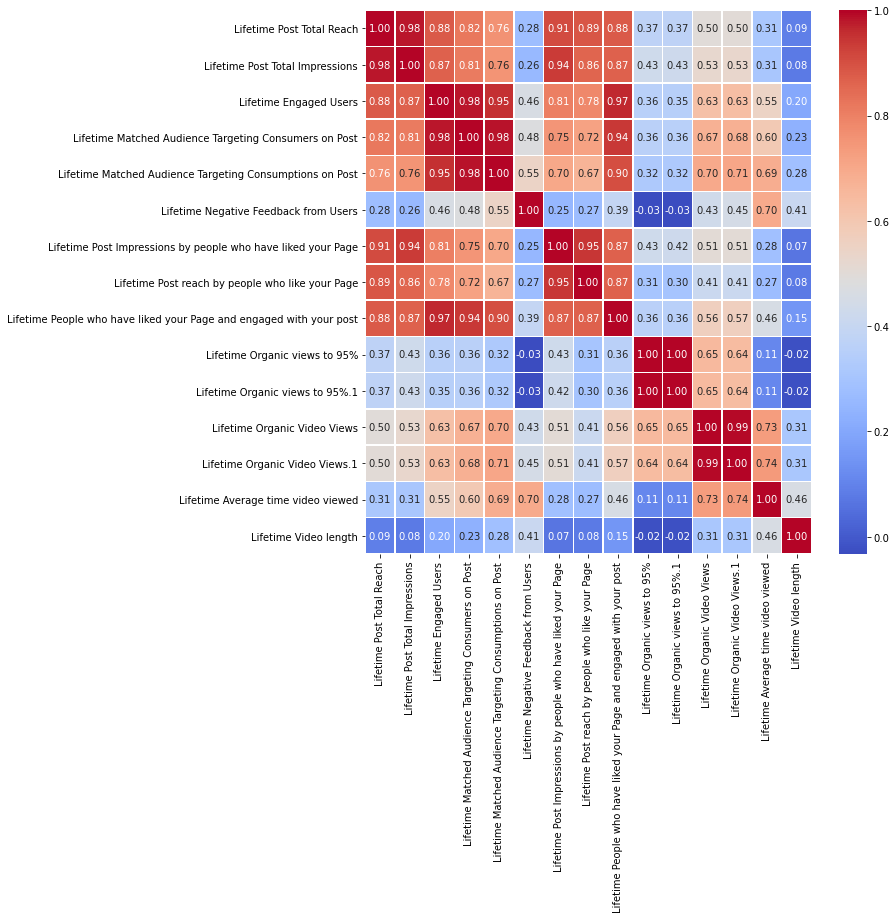

In [264]:
fig, ax = plt.subplots(figsize=(10,10))   
g = sns.heatmap( data.corr(), annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax, linewidths=.5 )

### Analyzing Heatmap
**Lifetime Post Total Reach**, **Lifetime Post Total Impressions** columns has getter then 98% correlation each other. so we can take one columns for further analysis.
**Lifetime Engaged Users**, **Lifetime Matched Audience Targeting Consumers on Post**, **Lifetime Matched Audience Targeting Consumptions on Post**, These columns has getter then 95% correlation each other. so we can take one columns for further analysis.

## Frequency of type of posts on AUST IDC page

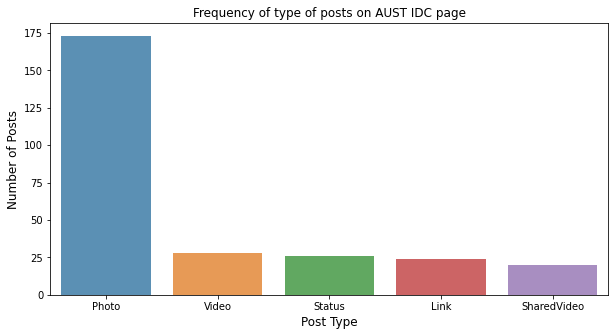

In [265]:
#sns.displot(data, x='Type', shrink=0.8)
Type_count  = data['Type'].value_counts()
Type_count = Type_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(Type_count.index, Type_count.values, alpha=0.8)
plt.title('Frequency of type of posts on AUST IDC page')
plt.ylabel('Number of Posts', fontsize=12)
plt.xlabel('Post Type', fontsize=12)
plt.show()

# Post Message quality analysis

## Visualizing the most frequently used words on the posts of AUST IDC page
First we need to remove the stopwords (are, is, the) that might harm the results of our next visualization.

## Importing and Downloading libraries


In [266]:
import string 
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /home/deep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/deep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* We need to tokenize our text from the post message
* Lowercase all the text
* Replace punctuation from the message
* Remove stopwords from the text

In [267]:
def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    punct = str.maketrans('', '', string.punctuation)
    text = [word.translate(punct) for word in text]
    text = [word for word in text if not word in stopwords]
    return text
data['Post Message'] = data['Post Message'].apply(clean)

### Generate data of the most common words using Counter

In [268]:
from collections import Counter
def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg]+=1
    return cnt
text_cnt= counter(data['Post Message'])

In [269]:
text_cnt.most_common(5)

[('aust', 257), ('club', 158), ('idc', 129), ('https', 97), ('innovation', 91)]

## Visualizing the most common words

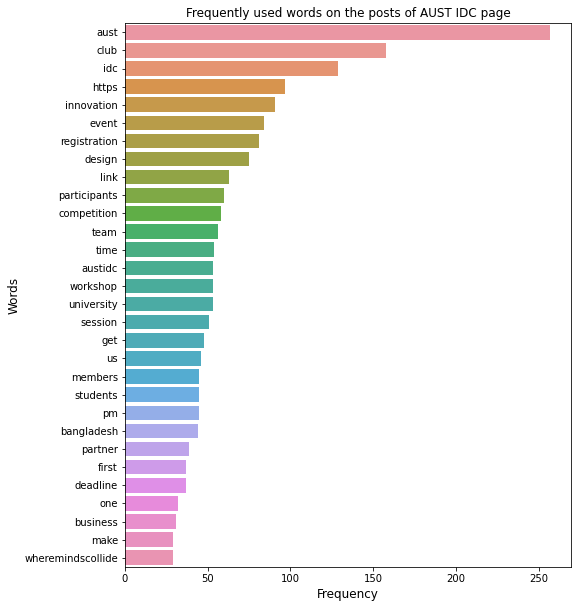

In [270]:
common_words = text_cnt.most_common(30)
common_words = pd.DataFrame(common_words, columns = ['Words', 'Counts'])
plt.figure(figsize=(8,10))
sns.barplot(y='Words', x='Counts', data=common_words)
plt.title('Frequently used words on the posts of AUST IDC page')
plt.ylabel('Words', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.show()

In [271]:
#data1['Post Message']= data['Post Message'].astype(str)
#type(data1['Post Message'])

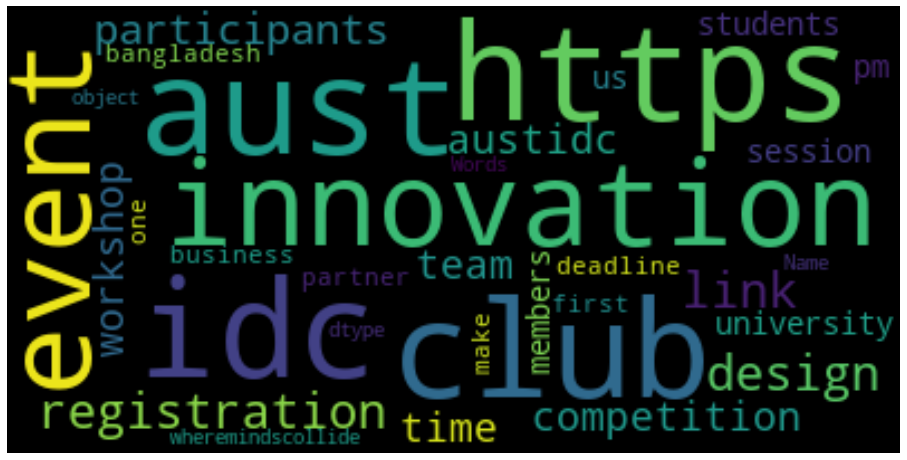

In [272]:
from wordcloud import WordCloud
data1['Post Message']= data['Post Message'].tolist()
type(data1['Post Message'])
#wordcloud = WordCloud(max_font_size=60).generate(str(data1['Post Message']))
wordcloud = WordCloud(max_font_size=60).generate(str(common_words['Words']))
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


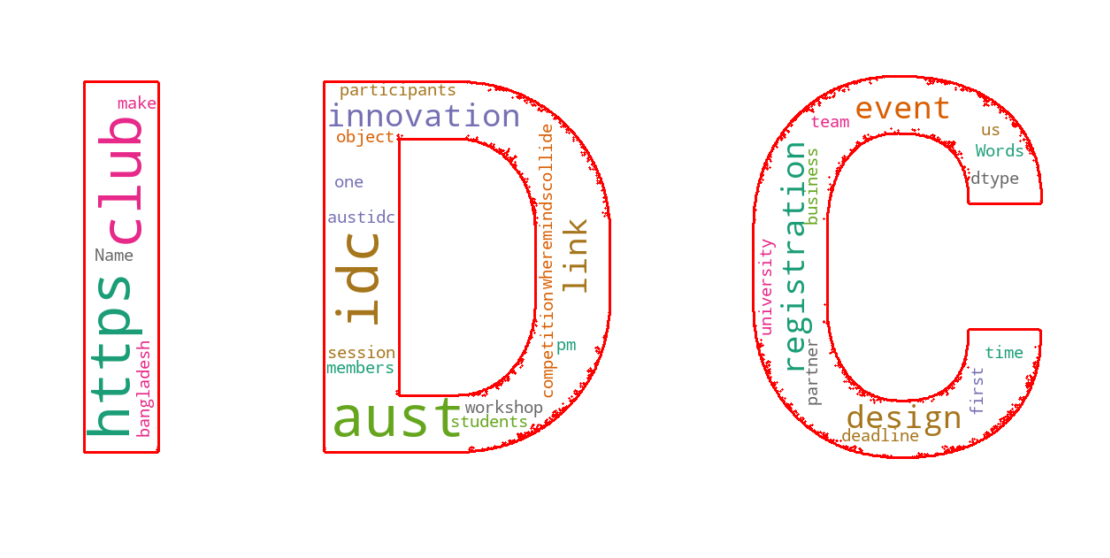

In [273]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
### colormap

# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('sss.jpg'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='red',
                      mask=cand_mask, colormap='Dark2',
                      contour_width=2).generate(str(common_words['Words']))


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:>

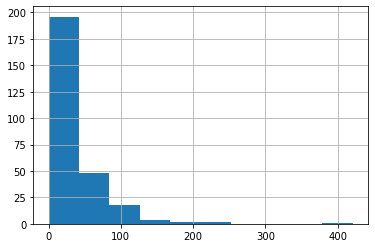

In [274]:
data['Post Message'].str.len().hist()

In [275]:
p1=pd.read_csv('Clean_insight_002.csv')

## Sentiment Analysis of Post Messages

We've used Textblob python library. Here, the sentiment function of TextBlob returns two properties. One of tthem is polarity, a floating-point number that have ranges (1,-1), where 1 means positive statement and -1 means a negative statement.

<AxesSubplot:>

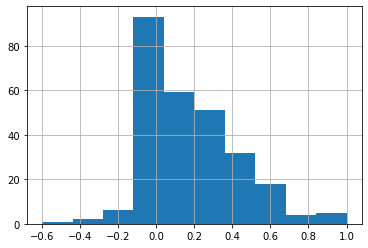

In [276]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

p1['polarity_score']=p1['Post Message'].\
   apply(lambda x : polarity(x))
p1['polarity_score'].hist()

### Categorizing the post based on polarity score

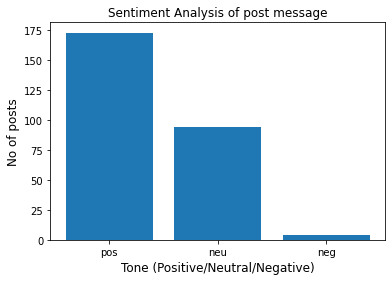

In [277]:
def sentiment(x):
    if x< (-0.2):
        return 'neg'
    elif x>= (-0.2) and x<=0:
        return 'neu'
    else:
        return 'pos'
    
p1['polarity']=p1['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(p1.polarity.value_counts().index,
        p1.polarity.value_counts())
plt.title('Sentiment Analysis of post message')
plt.ylabel('No of posts', fontsize=12)
plt.xlabel('Tone (Positive/Neutral/Negative)', fontsize=12)
plt.show()

### We can see that most of the posts have positive or neutral tone which is good for community engagement. The number of posts with negatiive tone comparatively lower which is good
### Still we can do further analysis by finding the exact posts with positive/negative sentiment

### Sample positive posts

In [278]:
p1[p1['polarity']=='pos']['Post Message'].head()

0    Congratulations to the winners of the first on...
1    May your Eid celebrations be as charming as th...
2    Wishing everyone a very happy Eid al-Fitr. As ...
4    Hey IDCians! We are here with our first online...
6    *Drumroll please* AUST Innovation and Design C...
Name: Post Message, dtype: object

### Sample negative posts

In [279]:
p1[p1['polarity']=='neg']['Post Message'].head()

21      Seminar on Robotics and Artificial Intelligence"
110    ***The winner of Pi Game*** ***Ashik Rahman***...
156    Are you done with your submission? You have le...
163    AUST IDC has partnered with Robotics Club of B...
Name: Post Message, dtype: object

## From the above list of negative posts, we can see some post are not actually negative but classified as negative by textBlob. So, we'll use vader library further to verify. Vader library is better than textBlob when recognizing **Negative** posts

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/deep/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


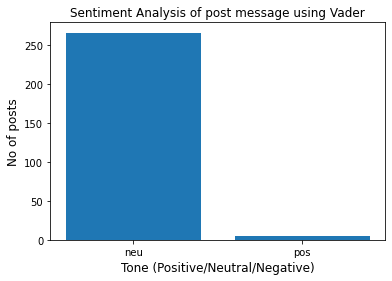

In [280]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

p1['polarity']=p1['Post Message'].\
    map(lambda x: get_vader_score(x))
polarity=p1['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())
plt.title('Sentiment Analysis of post message using Vader')
plt.ylabel('No of posts', fontsize=12)
plt.xlabel('Tone (Positive/Neutral/Negative)', fontsize=12)
plt.show()

## From the above analysis we can conclude that most of posts have either positive or neutral tone which is a good measurement of the posts.

### Now we can analyze how informative the post of the page are. We are using Named entity recognition method which is an information extraction method in which entities present in the text are classified into predefined entity types catagory like “Person”,” Place”,” Organization”, etc. We can get insights about the types of entities present in the given Post message.



In [281]:
import spacy
import en_core_web_sm

#nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm")

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=p1['Post Message'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

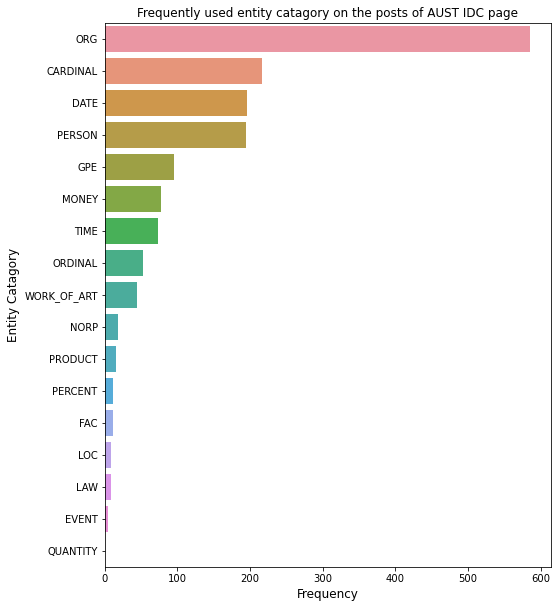

In [282]:
x,y=map(list,zip(*count))
plt.figure(figsize=(8,10))
sns.barplot(x=y,y=x)

plt.title('Frequently used entity catagory on the posts of AUST IDC page')
plt.ylabel('Entity Catagory', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.show()

### For better understanding
![caption](ner.png)

### Further analysis can be done for individual posts

In [283]:
doc=nlp('Poster Maestros commenced with a purpose to seek out the most talented individuals who have infused remarkable ingeniosity with meticulous craftsmanship. Ladies and gentlemen, we present to you the very best teams that have managed to hurdle all boundaries to take place in these finals. Finalists, I am sure you will provide nothing short of your finest works. Best of luck!  See you all in the final round at 11th January,where the top 20 teams will compete for inter-departmental glory!.  **this is the edited list...and also thank you all for completing your payment process in time!!  :)')

[(x.text,x.label_) for x in doc.ents]
from spacy import displacy

displacy.render(doc, style='ent')

## Readability analysis of the posts. 
From this we can assess if the the suitability of a text for an audiance. There are different techniques and methods for checking the readability of a text. Some of the most popular techniques are Flesch Reading Ease, Gunning for etc. 


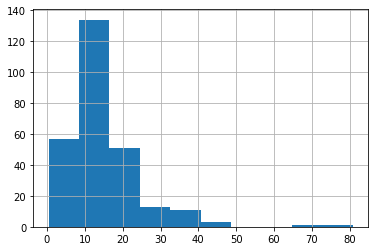

In [284]:
from textstat import flesch_reading_ease
from textstat import gunning_fog
#apply(lambda x : flesch_reading_ease(x)).hist()
p1['Post Message'].\
   apply(lambda x : gunning_fog(x)).hist()
    
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [285]:
p1.columns

Index(['Post ID', 'Post Message', 'Type', 'Posted',
       'Lifetime Post Total Reach', 'Lifetime Post Total Impressions',
       'Lifetime Engaged Users',
       'Lifetime Matched Audience Targeting Consumers on Post',
       'Lifetime Matched Audience Targeting Consumptions on Post',
       'Lifetime Negative Feedback from Users',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Lifetime Organic views to 95%', 'Lifetime Organic views to 95%.1',
       'Lifetime Organic Video Views', 'Lifetime Organic Video Views.1',
       'Lifetime Average time video viewed', 'Lifetime Video length',
       'polarity_score', 'polarity'],
      dtype='object')

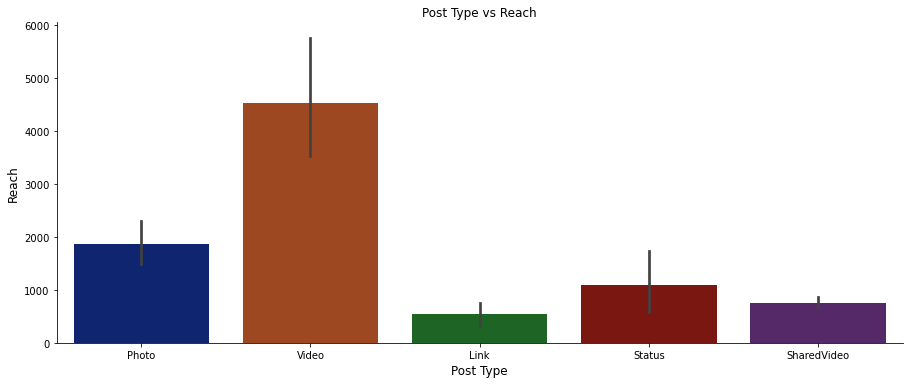

In [286]:
g = sns.catplot(
    data=p1, kind="bar",
    x="Type", y="Lifetime Post Total Reach",
    palette="dark" ,size=5,aspect=2.5
)
plt.title('Post Type vs Reach')
plt.ylabel('Reach', fontsize=12)
plt.xlabel('Post Type', fontsize=12)
plt.show()

### From the above plot, Facebook algorithm favors video content more than other type of posts and have more reach. If we want the post to reach more, we need to focus on video contents.

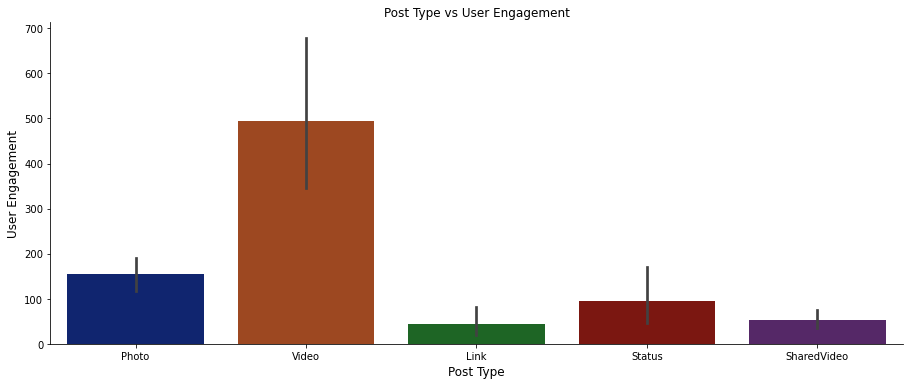

In [287]:
g = sns.catplot(
    data=p1, kind="bar",
    x="Type", y="Lifetime Engaged Users",
    palette="dark" ,size=5,aspect=2.5
)
plt.title('Post Type vs User Engagement')
plt.ylabel('User Engagement', fontsize=12)
plt.xlabel('Post Type', fontsize=12)
plt.show()

### From the above plot, Users engage in video content more than other type of posts. Video content will results in more user engagement on page posts.

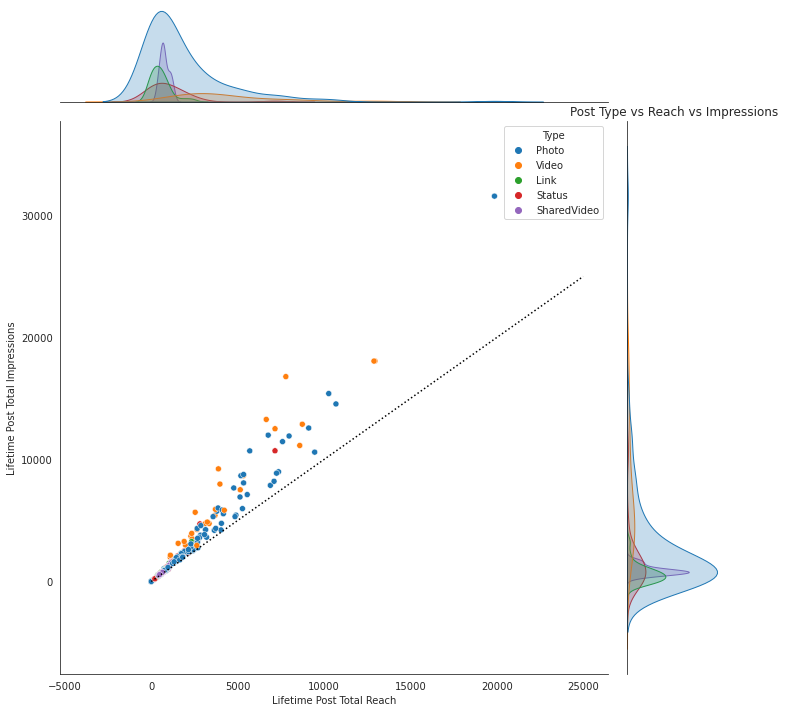

In [288]:
with sns.axes_style('white'):
    g = sns.jointplot("Lifetime Post Total Reach", "Lifetime Post Total Impressions", p1, hue="Type", size=10 )
    g.ax_joint.plot(np.linspace(0, 25000),
                    np.linspace(0, 25000), ':k')
plt.title('Post Type vs Reach vs Impressions')
#plt.xlim([0, 25000])
#plt.ylim([0, 25000])
plt.show()

### From the plot above we can distinguish between post reach and impressions. Post impression always tends to be same or higher than reach. This is because reach is based on unique users and impressions is not. If the post is appeared on screen of a person multiple times, the impressions increases but reach remains same.

### From the plot we can see videos have a chance to appear multiple times on a person's screen  more than other type of contents.

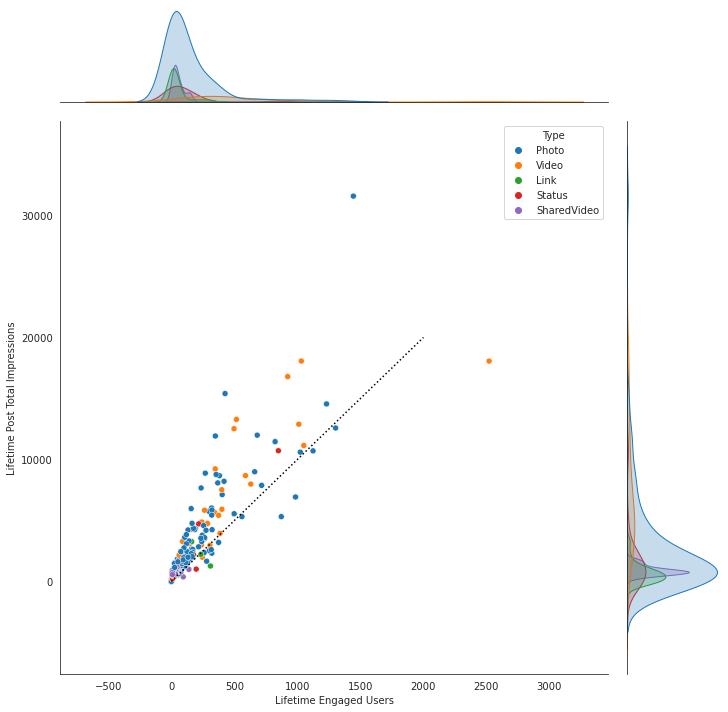

In [289]:
with sns.axes_style('white'):
    g = sns.jointplot("Lifetime Engaged Users", "Lifetime Post Total Impressions", p1, hue="Type", size=10 )
    g.ax_joint.plot(np.linspace(0, 2000),
                    np.linspace(0, 20000), ':k')
    #g.ax_joint.set_xscale('linear')
    #g.ax_joint.set_yscale('linear')
    
    
#plt.xlim([0, 25000])
#plt.xlim([0, 2000])
plt.show()

In [290]:
p1['Posted']=pd.to_datetime(p1['Posted'],dayfirst=True)
p1 = p1.sort_values(by="Posted")
p1.Posted

30    2017-12-31 09:58:18
29    2018-01-01 04:20:56
28    2018-01-01 10:58:33
27    2018-01-03 09:37:45
26    2018-01-04 22:24:49
              ...        
244   2021-02-21 00:04:42
243   2021-02-24 09:19:43
242   2021-03-02 08:58:40
241   2021-03-03 09:01:38
240   2021-03-04 20:00:56
Name: Posted, Length: 271, dtype: datetime64[ns]

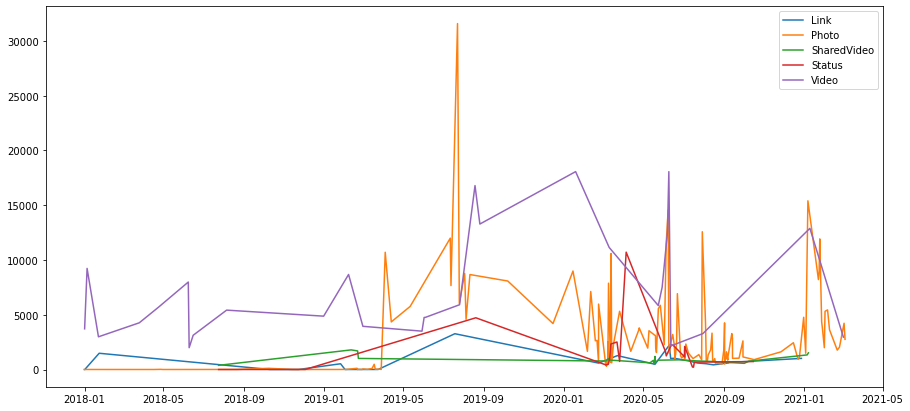

In [291]:
fig, ax = plt.subplots(figsize=(15,7))
for key, grp in p1.groupby(['Type']):
    ax.plot(grp['Posted'], grp['Lifetime Post Total Impressions'], label=key)

ax.legend()
plt.show()

In [292]:
p2=pd.read_csv('Clean_insight_002.csv')

In [293]:
p2['Posted']=pd.to_datetime(p2['Posted'],dayfirst=True)

In [294]:
hour = p2['Posted'].dt.hour.rename('Hour')
df_plot = p2.groupby(hour).apply(lambda x: x['Type'].value_counts() / x.shape[0]) \
            .rename_axis(index=['Hour', 'Type']) \
            .to_frame('Frequency') \
            .reset_index()

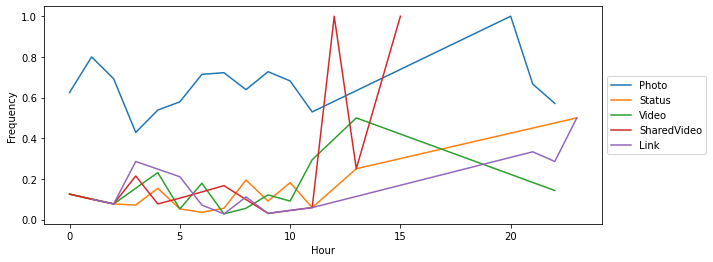

In [295]:
ax = sns.lineplot(data=df_plot, x='Hour', y='Frequency', hue='Type')
ax.figure.set_size_inches(10, 4)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### The plot above shows the hourly post frequency over the years. Data shows from midnight to morning we have low rate of post and evening the post frequency increases

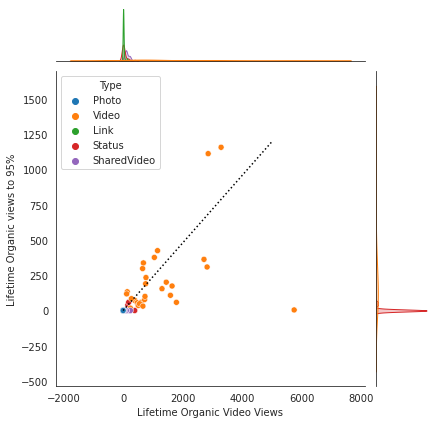

In [296]:

with sns.axes_style('white'):
    g = sns.jointplot(x='Lifetime Organic Video Views', y='Lifetime Organic views to 95%', hue='Type', data=p2)
    g.ax_joint.plot(np.linspace(0, 5000),
                    np.linspace(0, 1200), ':k')

plt.show()

### The plot above shows that most of the video viewed by users were not engaged till 95% of its length. That means the video content are not luring for the users to fully watch. We do need to make the video contents more intriguing to capture viewer's attention.

## Now we will determine what kind of posts are more user engaging. It'll help to make decision on future content type that will be more engaging

In [297]:
df4=p2.groupby(['Type'])['Lifetime Post Total Impressions'].sum().reset_index()
df5=p2.groupby(['Type'])['Lifetime Engaged Users'].sum().reset_index()
df6=pd.merge(df4, df5)
df6

,Type,Lifetime Post Total Impressions,Lifetime Engaged Users
0,Link,16463,1077
1,Photo,431252,26692
2,SharedVideo,18720,1066
3,Status,38307,2478
4,Video,205324,13853


<AxesSubplot:xlabel='Type'>

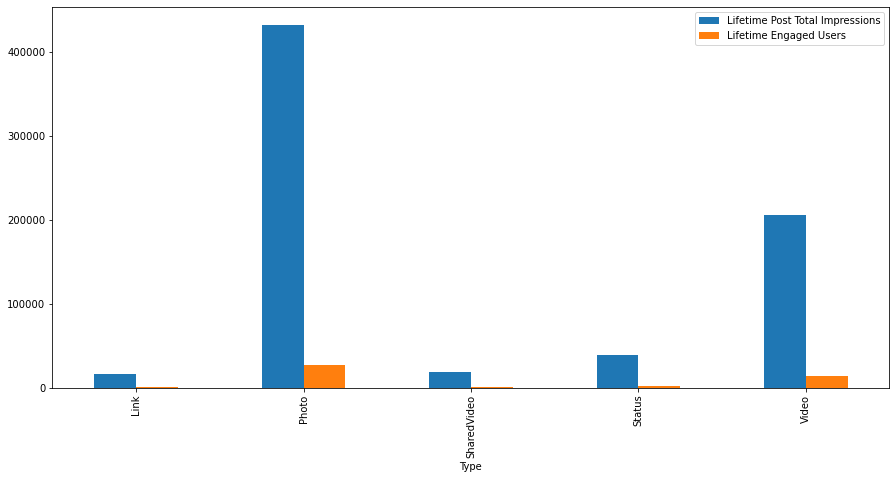

In [298]:
df6.plot(x="Type", y=["Lifetime Post Total Impressions", "Lifetime Engaged Users"], kind="bar",figsize=(15,7))

In [299]:
df6['Percentage']=(df6['Lifetime Engaged Users']/df6['Lifetime Post Total Impressions'])*100
df6

,Type,Lifetime Post Total Impressions,Lifetime Engaged Users,Percentage
0,Link,16463,1077,6.541943
1,Photo,431252,26692,6.189421
2,SharedVideo,18720,1066,5.694444
3,Status,38307,2478,6.468792
4,Video,205324,13853,6.746898


## From the above Table we can see, video has the highest Impression vs Engage ratio. That means, users engage(click, like, comment) on video content more than others. Photos do have good impressions but user engagement is slighhtly low. If we want the posts to be more engaging, video content is our best bet here.


<a id="content3"></a>
 # Loading the insight_001.csv dataset
 <br> </br>

In [300]:
data1=pd.read_csv('insight_001.csv',skiprows=[1])

## Understanding the data

In [301]:
data1.head(10)

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,...,Weekly Total web site click count per Page by age and gender - 55-64.U,Weekly Total web site click count per Page by age and gender - 65+.F,Weekly Total web site click count per Page by age and gender - 65+.M,Weekly Total web site click count per Page by age and gender - 65+.U,Weekly Total web site click count per Page by age and gender - &lt;13.F,Weekly Total web site click count per Page by age and gender - &lt;13.M,Weekly Total web site click count per Page by age and gender - &lt;13.U,Weekly Total web site click count per Page by age and gender - UNKNOWN.F,Weekly Total web site click count per Page by age and gender - UNKNOWN.M,Weekly Total web site click count per Page by age and gender - UNKNOWN.U
0,2/7/2021,9239,3.0,2.0,29,928,4219,921,8867,31929,...,0,0,0,0,0,0,0,0,0,0
1,2/8/2021,9241,3.0,2.0,22,872,4046,556,8784,31373,...,0,0,0,0,0,0,0,0,0,0
2,2/9/2021,9241,1.0,NaN,91,584,3954,2240,7717,30984,...,0,0,0,0,0,0,0,0,0,0
3,2/10/2021,9243,3.0,1.0,19,473,3294,616,7235,28830,...,0,0,0,0,0,0,0,0,0,0
4,2/11/2021,9242,NaN,1.0,11,455,3090,443,7184,28438,...,0,0,0,0,0,0,0,0,0,0
5,2/12/2021,9249,7.0,NaN,17,449,2921,448,7161,27792,...,0,0,0,0,0,0,0,0,0,0
6,2/13/2021,9250,1.0,NaN,6,189,2641,254,4806,26343,...,0,0,0,0,0,0,0,0,0,0
7,2/14/2021,9253,4.0,1.0,83,228,2411,1372,4859,25312,...,0,0,0,0,0,0,0,0,0,0
8,2/15/2021,9257,5.0,NaN,54,255,2301,1372,5750,25052,...,0,0,0,0,0,0,0,0,0,0
9,2/16/2021,9260,3.0,NaN,74,237,2231,1474,5336,25031,...,0,0,0,0,0,0,0,0,0,0


In [302]:
data1.columns

Index(['Date', 'Lifetime Total Likes', 'Daily New Likes', 'Daily Unlikes',
       'Daily Page Engaged Users', 'Weekly Page Engaged Users',
       '28 Days Page Engaged Users', 'Daily Total Reach', 'Weekly Total Reach',
       '28 Days Total Reach',
       ...
       'Weekly Total web site click count per Page by age and gender - 55-64.U',
       'Weekly Total web site click count per Page by age and gender - 65+.F',
       'Weekly Total web site click count per Page by age and gender - 65+.M',
       'Weekly Total web site click count per Page by age and gender - 65+.U',
       'Weekly Total web site click count per Page by age and gender - &lt;13.F',
       'Weekly Total web site click count per Page by age and gender - &lt;13.M',
       'Weekly Total web site click count per Page by age and gender - &lt;13.U',
       'Weekly Total web site click count per Page by age and gender - UNKNOWN.F',
       'Weekly Total web site click count per Page by age and gender - UNKNOWN.M',
       'We

## Taking care of missing data

In [303]:
missing=data1.columns[data1.isna().any()<.1].tolist()
len(missing)

403

In [304]:
missing

['Date',
 'Lifetime Total Likes',
 'Daily Page Engaged Users',
 'Weekly Page Engaged Users',
 '28 Days Page Engaged Users',
 'Daily Total Reach',
 'Weekly Total Reach',
 '28 Days Total Reach',
 'Daily Organic Reach',
 'Weekly Organic Reach',
 '28 Days Organic Reach',
 'Daily Viral Reach',
 'Weekly Viral Reach',
 '28 Days Viral Reach',
 'Daily Total Impressions',
 'Weekly Total Impressions',
 '28 Days Total Impressions',
 'Daily Organic impressions',
 'Weekly Organic impressions',
 '28 Days Organic impressions',
 'Daily Viral impressions',
 'Weekly Viral impressions',
 '28 Days Viral impressions',
 'Daily Reach Of Page Posts',
 'Weekly Reach Of Page Posts',
 '28 Days Reach Of Page Posts',
 'Daily Organic Reach of Page posts',
 'Weekly Organic Reach of Page posts',
 '28 Days Organic Reach of Page posts',
 'Daily Viral Reach Of Page Posts',
 'Weekly Viral Reach Of Page Posts',
 '28 Days Viral Reach Of Page Posts',
 'Daily Total Impressions of your posts',
 'Weekly Total Impressions of you

In [305]:
print (data1.isin([' ','NULL',0]).mean())

Date                                                                        0.0
Lifetime Total Likes                                                        0.0
Daily New Likes                                                             0.0
Daily Unlikes                                                               0.0
Daily Page Engaged Users                                                    0.0
                                                                           ... 
Weekly Total web site click count per Page by age and gender - &lt;13.M     1.0
Weekly Total web site click count per Page by age and gender - &lt;13.U     1.0
Weekly Total web site click count per Page by age and gender - UNKNOWN.F    1.0
Weekly Total web site click count per Page by age and gender - UNKNOWN.M    1.0
Weekly Total web site click count per Page by age and gender - UNKNOWN.U    1.0
Length: 1226, dtype: float64


In [306]:
df = data1.loc[:, data1.isnull().mean() < .5]
df

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,...,Weekly Total web site click count per Page by age and gender - 55-64.U,Weekly Total web site click count per Page by age and gender - 65+.F,Weekly Total web site click count per Page by age and gender - 65+.M,Weekly Total web site click count per Page by age and gender - 65+.U,Weekly Total web site click count per Page by age and gender - &lt;13.F,Weekly Total web site click count per Page by age and gender - &lt;13.M,Weekly Total web site click count per Page by age and gender - &lt;13.U,Weekly Total web site click count per Page by age and gender - UNKNOWN.F,Weekly Total web site click count per Page by age and gender - UNKNOWN.M,Weekly Total web site click count per Page by age and gender - UNKNOWN.U
0,2/7/2021,9239,3.0,2.0,29,928,4219,921,8867,31929,...,0,0,0,0,0,0,0,0,0,0
1,2/8/2021,9241,3.0,2.0,22,872,4046,556,8784,31373,...,0,0,0,0,0,0,0,0,0,0
2,2/9/2021,9241,1.0,NaN,91,584,3954,2240,7717,30984,...,0,0,0,0,0,0,0,0,0,0
3,2/10/2021,9243,3.0,1.0,19,473,3294,616,7235,28830,...,0,0,0,0,0,0,0,0,0,0
4,2/11/2021,9242,NaN,1.0,11,455,3090,443,7184,28438,...,0,0,0,0,0,0,0,0,0,0
5,2/12/2021,9249,7.0,NaN,17,449,2921,448,7161,27792,...,0,0,0,0,0,0,0,0,0,0
6,2/13/2021,9250,1.0,NaN,6,189,2641,254,4806,26343,...,0,0,0,0,0,0,0,0,0,0
7,2/14/2021,9253,4.0,1.0,83,228,2411,1372,4859,25312,...,0,0,0,0,0,0,0,0,0,0
8,2/15/2021,9257,5.0,NaN,54,255,2301,1372,5750,25052,...,0,0,0,0,0,0,0,0,0,0
9,2/16/2021,9260,3.0,NaN,74,237,2231,1474,5336,25031,...,0,0,0,0,0,0,0,0,0,0


In [307]:
df.nunique(axis=0)

Date                                                                        28
Lifetime Total Likes                                                        26
Daily New Likes                                                              9
Daily Unlikes                                                                2
Daily Page Engaged Users                                                    26
                                                                            ..
Weekly Total web site click count per Page by age and gender - &lt;13.M      1
Weekly Total web site click count per Page by age and gender - &lt;13.U      1
Weekly Total web site click count per Page by age and gender - UNKNOWN.F     1
Weekly Total web site click count per Page by age and gender - UNKNOWN.M     1
Weekly Total web site click count per Page by age and gender - UNKNOWN.U     1
Length: 719, dtype: int64

In [308]:
df1 = df.loc[:, (df==0).mean() < .5]
df1

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,...,Daily Liked and Online - 14,Daily Liked and Online - 15,Daily Liked and Online - 16,Daily Liked and Online - 17,Daily Liked and Online - 18,Daily Liked and Online - 19,Daily Liked and Online - 20,Daily Liked and Online - 21,Daily Liked and Online - 22,Daily Liked and Online - 23
0,2/7/2021,9239,3.0,2.0,29,928,4219,921,8867,31929,...,1126.0,851.0,1024.0,1359.0,2185.0,3068.0,3933.0,4371.0,4631.0,5142.0
1,2/8/2021,9241,3.0,2.0,22,872,4046,556,8784,31373,...,1058.0,803.0,1012.0,1462.0,2171.0,3053.0,3900.0,4415.0,4658.0,5071.0
2,2/9/2021,9241,1.0,NaN,91,584,3954,2240,7717,30984,...,1085.0,813.0,1018.0,1579.0,2203.0,3097.0,3930.0,4328.0,4673.0,5181.0
3,2/10/2021,9243,3.0,1.0,19,473,3294,616,7235,28830,...,1110.0,803.0,1044.0,1470.0,2249.0,3170.0,3903.0,4389.0,4706.0,5082.0
4,2/11/2021,9242,NaN,1.0,11,455,3090,443,7184,28438,...,1143.0,868.0,1052.0,1286.0,1954.0,2940.0,3792.0,4399.0,4805.0,4617.0
5,2/12/2021,9249,7.0,NaN,17,449,2921,448,7161,27792,...,1177.0,829.0,1031.0,1360.0,2021.0,3088.0,4041.0,4573.0,4917.0,5127.0
6,2/13/2021,9250,1.0,NaN,6,189,2641,254,4806,26343,...,1150.0,828.0,1095.0,1616.0,2723.0,3816.0,4697.0,5065.0,5244.0,5555.0
7,2/14/2021,9253,4.0,1.0,83,228,2411,1372,4859,25312,...,1068.0,834.0,1046.0,1507.0,2592.0,3665.0,4612.0,5054.0,5221.0,5631.0
8,2/15/2021,9257,5.0,NaN,54,255,2301,1372,5750,25052,...,1139.0,842.0,999.0,1388.0,2277.0,3290.0,4118.0,4669.0,5008.0,5462.0
9,2/16/2021,9260,3.0,NaN,74,237,2231,1474,5336,25031,...,1383.0,879.0,1063.0,1529.0,2694.0,3706.0,4640.0,4995.0,5213.0,5517.0


In [309]:
df1.describe()

,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,...,Daily Liked and Online - 14,Daily Liked and Online - 15,Daily Liked and Online - 16,Daily Liked and Online - 17,Daily Liked and Online - 18,Daily Liked and Online - 19,Daily Liked and Online - 20,Daily Liked and Online - 21,Daily Liked and Online - 22,Daily Liked and Online - 23
count,28.000000,26.000000,16.000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,9277.071429,4.269231,1.375,88.214286,528.428571,2316.178571,4477.071429,21593.000000,45856.035714,4472.500000,...,1170.884615,865.615385,1064.153846,1481.653846,2398.576923,3437.307692,4341.576923,4802.846154,5080.769231,5394.884615
std,28.729812,2.375840,0.500,84.453957,222.407605,760.124261,5861.612899,16544.849439,18186.551007,5858.040853,...,80.048149,45.147826,40.557803,131.261553,322.164203,372.899747,370.834645,290.638152,228.181736,292.009634
min,9239.000000,1.000000,1.000,6.000000,189.000000,1659.000000,254.000000,4251.000000,24566.000000,253.000000,...,1058.000000,803.000000,999.000000,1286.000000,1954.000000,2915.000000,3792.000000,4328.000000,4631.000000,4617.000000
25%,9252.250000,2.250000,1.000,18.500000,333.250000,1763.250000,552.500000,7178.250000,28732.000000,548.500000,...,1122.250000,828.250000,1039.250000,1355.250000,2060.500000,3078.250000,3956.250000,4534.750000,4955.500000,5143.250000
50%,9274.500000,4.000000,1.000,65.000000,510.000000,2089.500000,1423.000000,15218.500000,48587.000000,1422.000000,...,1145.500000,858.000000,1051.000000,1518.000000,2414.000000,3477.500000,4400.500000,4850.000000,5146.500000,5457.500000
75%,9294.750000,6.750000,2.000,143.000000,654.000000,2468.500000,6744.500000,36932.500000,51835.000000,6744.250000,...,1248.500000,898.750000,1098.000000,1602.000000,2715.250000,3809.000000,4695.750000,5057.000000,5244.750000,5630.750000
max,9343.000000,9.000000,2.000,341.000000,928.000000,4219.000000,18556.000000,54018.000000,83396.000000,18556.000000,...,1383.000000,957.000000,1156.000000,1646.000000,2802.000000,3907.000000,4865.000000,5166.000000,5388.000000,5754.000000


In [310]:
df1.fillna(method='ffill',inplace = True)

In [311]:
df1.fillna(method='backfill',inplace = True)

In [312]:
df1 = df1.loc[:, (df1==1).mean() < .5]

In [313]:
df1 = df1.loc[:, (df1==15).mean() < .5]
df1 = df1.loc[:, (df1==6).mean() < .5]
df1 = df1.loc[:, (df1==2).mean() < .5]
df1 = df1.loc[:, (df1==7).mean() < .5]
df1 = df1.loc[:, (df1==36).mean() < .5]

df1 = df1.loc[:, (df1==8).mean() < .5]
df1 = df1.loc[:, (df1==14).mean() < .5]
df1 = df1.loc[:, (df1==3).mean() < .5]
df1 = df1.loc[:, (df1==27).mean() < .5]
df1 = df1.loc[:, (df1==4).mean() < .5]

df1 = df1.loc[:, (df1==46).mean() < .5]
df1 = df1.loc[:, (df1==13).mean() < .5]
df1 = df1.loc[:, (df1==23).mean() < .5]
df1 = df1.loc[:, (df1==10).mean() < .5]
df1 = df1.loc[:, (df1==5).mean() < .5]
df1

,Date,Lifetime Total Likes,Daily New Likes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,...,Daily Liked and Online - 14,Daily Liked and Online - 15,Daily Liked and Online - 16,Daily Liked and Online - 17,Daily Liked and Online - 18,Daily Liked and Online - 19,Daily Liked and Online - 20,Daily Liked and Online - 21,Daily Liked and Online - 22,Daily Liked and Online - 23
0,2/7/2021,9239,3.0,29,928,4219,921,8867,31929,918,...,1126.0,851.0,1024.0,1359.0,2185.0,3068.0,3933.0,4371.0,4631.0,5142.0
1,2/8/2021,9241,3.0,22,872,4046,556,8784,31373,553,...,1058.0,803.0,1012.0,1462.0,2171.0,3053.0,3900.0,4415.0,4658.0,5071.0
2,2/9/2021,9241,1.0,91,584,3954,2240,7717,30984,2240,...,1085.0,813.0,1018.0,1579.0,2203.0,3097.0,3930.0,4328.0,4673.0,5181.0
3,2/10/2021,9243,3.0,19,473,3294,616,7235,28830,615,...,1110.0,803.0,1044.0,1470.0,2249.0,3170.0,3903.0,4389.0,4706.0,5082.0
4,2/11/2021,9242,3.0,11,455,3090,443,7184,28438,439,...,1143.0,868.0,1052.0,1286.0,1954.0,2940.0,3792.0,4399.0,4805.0,4617.0
5,2/12/2021,9249,7.0,17,449,2921,448,7161,27792,446,...,1177.0,829.0,1031.0,1360.0,2021.0,3088.0,4041.0,4573.0,4917.0,5127.0
6,2/13/2021,9250,1.0,6,189,2641,254,4806,26343,253,...,1150.0,828.0,1095.0,1616.0,2723.0,3816.0,4697.0,5065.0,5244.0,5555.0
7,2/14/2021,9253,4.0,83,228,2411,1372,4859,25312,1372,...,1068.0,834.0,1046.0,1507.0,2592.0,3665.0,4612.0,5054.0,5221.0,5631.0
8,2/15/2021,9257,5.0,54,255,2301,1372,5750,25052,1370,...,1139.0,842.0,999.0,1388.0,2277.0,3290.0,4118.0,4669.0,5008.0,5462.0
9,2/16/2021,9260,3.0,74,237,2231,1474,5336,25031,1472,...,1383.0,879.0,1063.0,1529.0,2694.0,3706.0,4640.0,4995.0,5213.0,5517.0


In [314]:
df1.to_csv('Clean_insight_001.csv', index = False)

## Save cleaned dats to new file

In [315]:
ds2 = pd.read_csv("Clean_insight_001.csv" )

## Analyzing the data

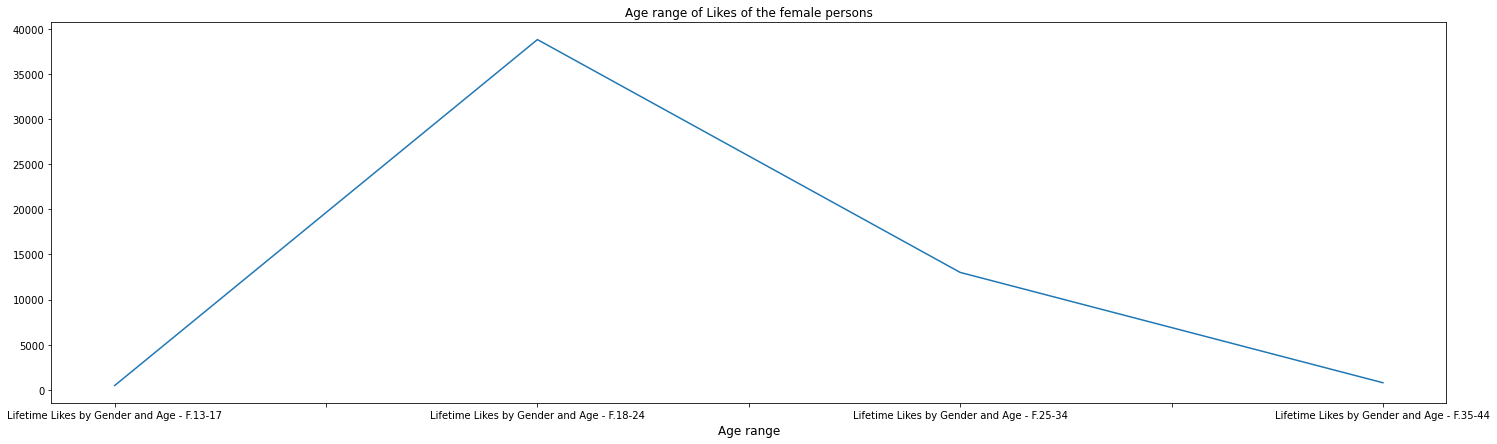

In [316]:
col = ds2.columns
start = col.get_loc("Lifetime Likes by Gender and Age - F.13-17")
finish = start + 4
lifetime_likes_by_gender_and_age_female = ds2.iloc[ 0:, start:finish ]
lifetime_likes_by_gender_and_age_female.sum().plot( figsize=(25,7) )
plt.title('Age range of Likes of the female persons')
plt.xlabel('Age range', fontsize=12)
plt.show()

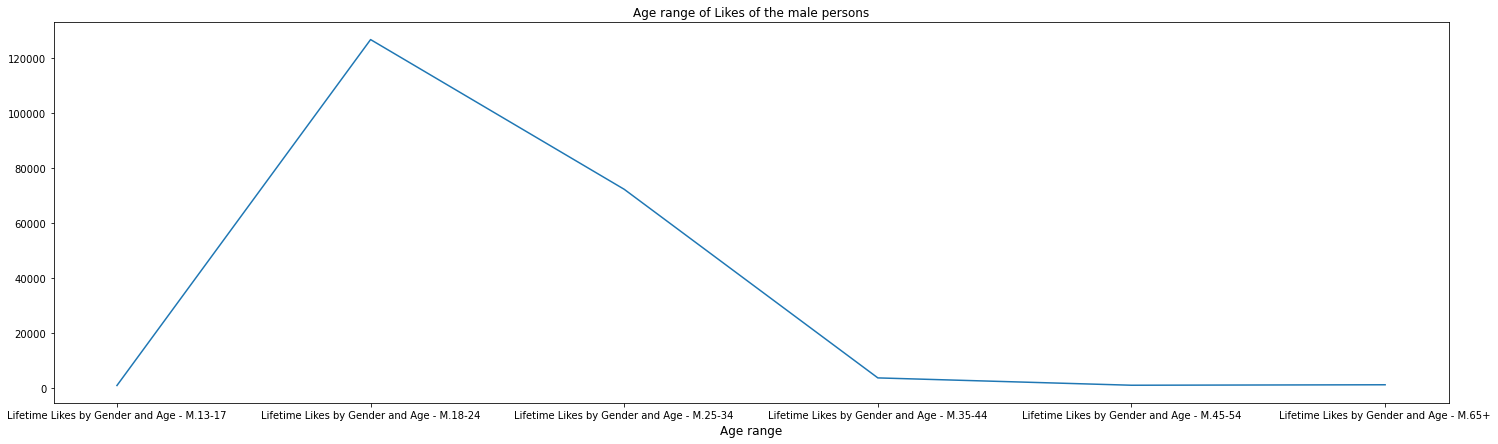

In [317]:
col = ds2.columns
start = col.get_loc("Lifetime Likes by Gender and Age - M.13-17")
finish = start + 6
lifetime_likes_by_gender_and_age_male = ds2.iloc[ 0:, start:finish ]
lifetime_likes_by_gender_and_age_male.sum().plot( figsize=(25,7) )
plt.title('Age range of Likes of the male persons')
plt.xlabel('Age range', fontsize=12)
plt.show()

### Page has more male users compare to female users

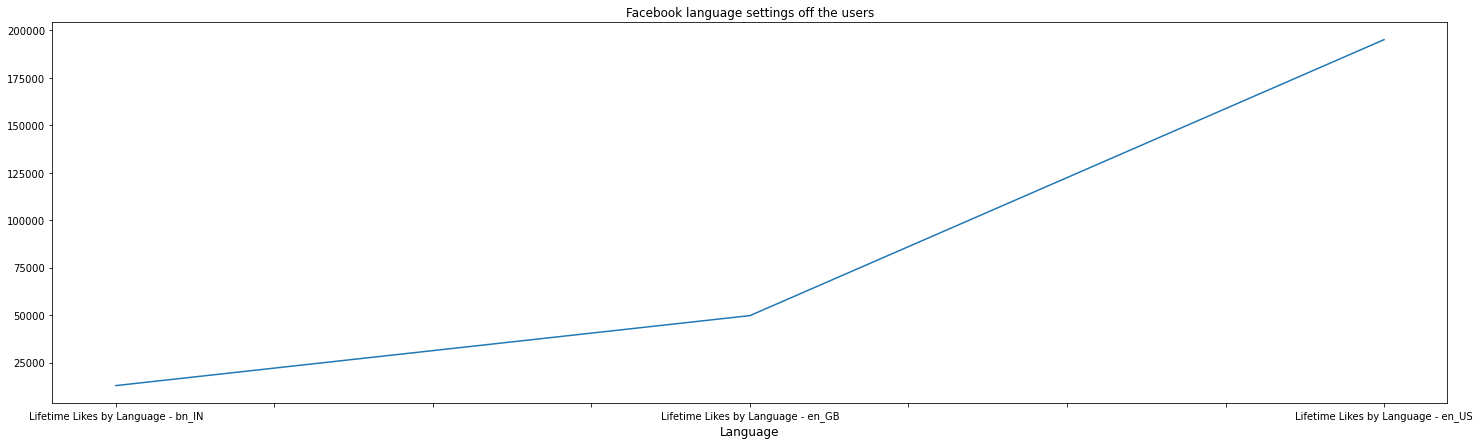

In [318]:
col = ds2.columns
start = col.get_loc("Lifetime Likes by Language - bn_IN")
finish = start + 3
lifetime_likes_by_language = ds2.iloc[ 0:, start:finish ]
lifetime_likes_by_language.sum().plot( figsize=(25,7) )
plt.title('Facebook language settings off the users')
plt.xlabel('Language', fontsize=12)
plt.show()

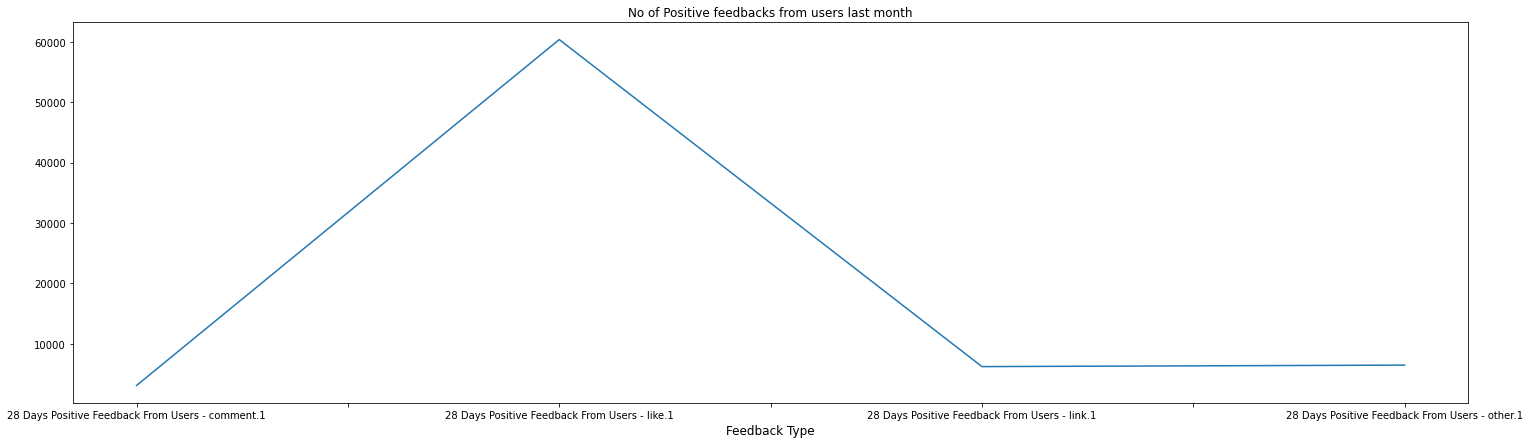

In [319]:
col = ds2.columns
start = col.get_loc("28 Days Positive Feedback From Users - comment.1")
finish = start + 4
positive_feedback_28_days = ds2.iloc[ 0:, start:finish ]
positive_feedback_28_days.sum().plot( figsize=(25,7) )
plt.title('No of Positive feedbacks from users last month')
plt.xlabel('Feedback Type', fontsize=12)
plt.show()

## Finding the best time to post on page

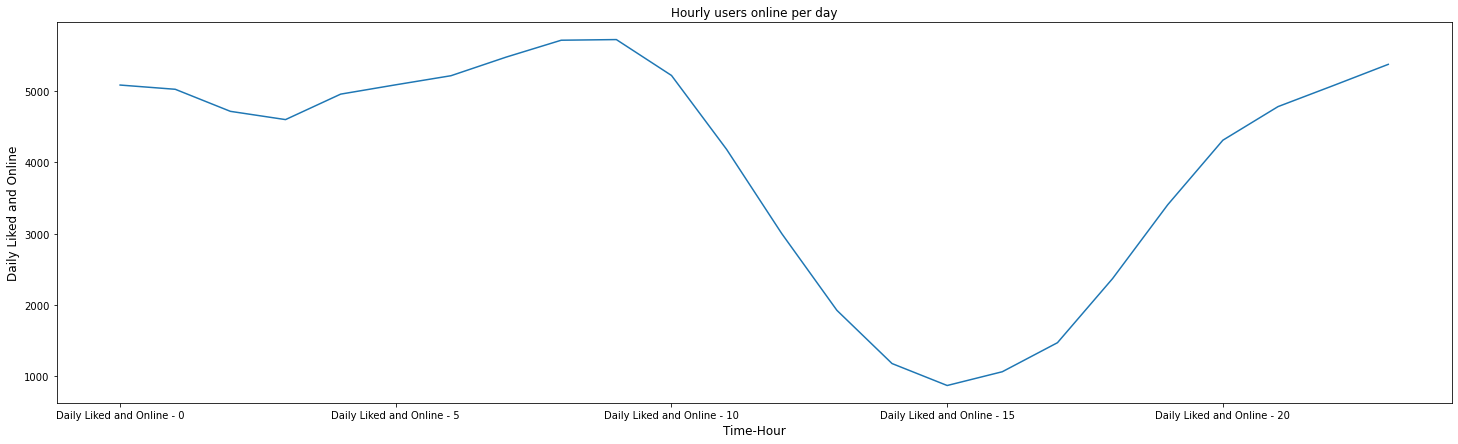

In [320]:
col = ds2.columns
start = col.get_loc("Daily Liked and Online - 0")
finish = start + 24
daily_liked_and_online = ds2.iloc[ 0:, start:finish ]
( daily_liked_and_online.sum()/28 ).plot( figsize=(25,7) )
plt.title('Hourly users online per day')
plt.ylabel('Daily Liked and Online', fontsize=12)
plt.xlabel('Time-Hour', fontsize=12)
plt.show()

### From the above data, we see a dip in no of online users from 10 am to 3 pm. This is mostly because less no of users are active on facebook in this time period. So, to reach to more users, we need to avoid this time period when posting updates on page

## Finding the best day to post on page

In [321]:
dsx = pd.read_csv( "Clean_insight_001.csv", parse_dates=["Date"] )
dsx['Day'] = dsx['Date'].dt.day_name()

In [322]:
col = dsx.columns
start = col.get_loc("Daily Liked and Online - 0")
finish = start + 24
daily_liked_and_online = dsx.iloc[ 0:, start:finish ]
dsx['Daily Liked and Online Total']= daily_liked_and_online.iloc[:, : ].sum(axis=1)

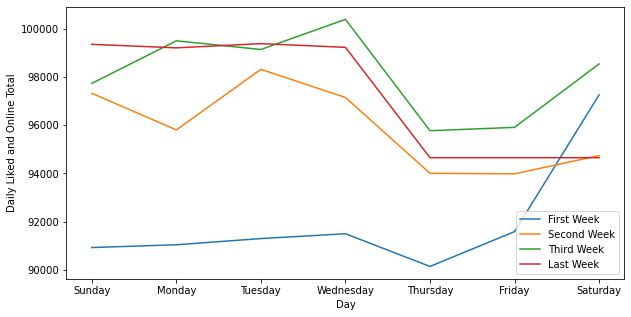

In [323]:
week = ["First Week","Second Week","Third Week","Last Week"]
k = 0
for i in range( 0, 28, 7 ):
  sns.lineplot( x='Day', y='Daily Liked and Online Total', data=dsx[i:(i+7)], legend="brief", label=week[k] )
  k += 1

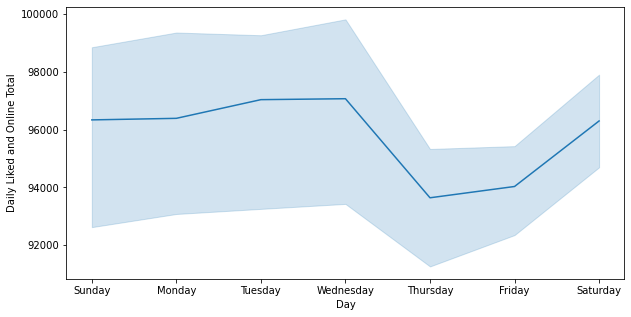

In [324]:
sns.lineplot(x='Day', y='Daily Liked and Online Total', data=dsx[0:] )
plt.show()

### From the above data of the last month, on Tuesday and Wednesday we can reach the most users

<a id="content4"></a>
 # Conclusion
 <br> </br>
We have stated our analysis and advice on above based on our findings. As a beginner, this competition was challenging to us in certain ways. We had a hands-on experience on cleaning, pre-processing the data, finding relations among the features. Completing all this tasks with the given time frame was challenging.
 
 
This kind of events will be helpful for us by improving our experiences through competitive mindset. We hope competitions related to data science field will be continued and encouraged in the future.
We cordially thank all the problem setters, members of AUST Innovation & Design Club, volunteers for arranging this event. 